## Programming workflow for VISUALIZING ADCP DATA
### © In_coast lab author: C. Hart, 2024-01-05

In [1]:
# Import necessary libraries
import easygui
import pandas as pd
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
sys.path.append(r'c:\users\s1495478\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [3]:
# read and format ADCP DATA
file_path = r'C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301.csv'
# df = df.drop(df.index)
df = pd.read_csv(file_path, quotechar='"', delimiter=';', skipinitialspace=True)
# print(df.columns)
df['DateTime'] = pd.to_datetime(df['DateTime'])
# print(df['DateTime'])
df = df.set_index('DateTime')
# df['Pressure'].plot()
# df['Speed#1(0.40m)'].plot()

In [4]:
# read pressure data
csv_file_path = r'C:\Users\S1495478\Documents\Weather Underground\MV_pres_20231003.txt'
df1 = pd.read_csv(csv_file_path, delimiter='\t')
df1['DateTime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])
df1 = df1.set_index('DateTime')
# df = df[1:1770]
# plt.plot(df1['pres (kPa)'])
# plt.plot(df['Pressure'])

C:\Users\S1495478\AppData\Local\Temp\ipykernel_25404\942056696.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['DateTime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])


In [5]:
# Assuming df is your DataFrame

file_path = r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v2"
data = np.loadtxt(file_path[1])

# Variables to plot
speed_columns = ['Speed#1(0.40m)', 'Speed#2(0.60m)', 'Speed#3(0.80m)', 'Speed#4(1.00m)', 'Speed#5(1.20m)',
                 'Speed#6(1.40m)', 'Speed#7(1.60m)', 'Speed#8(1.80m)', 'Speed#9(2.00m)', 'Speed#10(2.20m)',
                 'Speed#11(2.40m)', 'Speed#12(2.60m)', 'Speed#13(2.80m)', 'Speed#14(3.00m)', 'Speed#15(3.20m)',
                 'Speed#16(3.40m)', 'Speed#17(3.60m)', 'Speed#18(3.80m)', 'Speed#19(4.00m)', 'Speed#20(4.20m)']

# Depth column for colormap
depth_columns = []
dir_columns = []
depths = []

for col in speed_columns:
    depth = col[8:-2]
    if depth.startswith('('): depth = depth[1:]
    depths.append(float(depth))
    depth_column = 'Depth' + str(col[5:-7])
    depth_columns.append(depth_column)
    df[depth_column] = depth
    dir_column = 'Dir' + str(col[5:])
    dir_columns.append(dir_column)

for i in range(0, len(speed_columns)):
    col = []
    for j in range(len(data)):
        col.append(data[j][i])
        
    col_df = pd.DataFrame(col, columns=['col'], index=df.index)
    new_column = pd.DataFrame({
        'data_column': col_df['col'],  # Example: Sum of existing columns
    })
    df = pd.concat([df, new_column], axis=1)

for i in range(0, len(speed_columns)):
    new_column = pd.DataFrame({
        'dir_column': df[dir_columns[i]],  # Example: Sum of existing columns
    })
    df = pd.concat([df, new_column], axis=1)
    
for i in range(0, len(speed_columns)):
    new_column = pd.DataFrame({
        'speed_column': df[speed_columns[i]],  # Example: Sum of existing columns
    })
    df = pd.concat([df, new_column], axis=1)


In [11]:
data_array = np.loadtxt(file_path[1])
dir_columns = df['dir_column'].to_numpy()
speed_columns = df['speed_column'].to_numpy()

speed_columns = np.transpose(speed_columns)
dir_columns = np.transpose(dir_columns)
data_array = np.transpose(data_array)

print(len(data_array), len(data_array[0]))
print(len(speed_columns), len(speed_columns[0]))
print(len(dir_columns), len(dir_columns[0]))

20 3444
20 3444
20 3444


3444 3444 3444
20 20 20


C:\Users\S1495478\AppData\Local\Temp\ipykernel_25404\3910224836.py:38: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X, Y, s=900, c=masked_array[:][0:len(df.index)], edgecolor='none', marker='|')


<Figure size 1000x600 with 0 Axes>

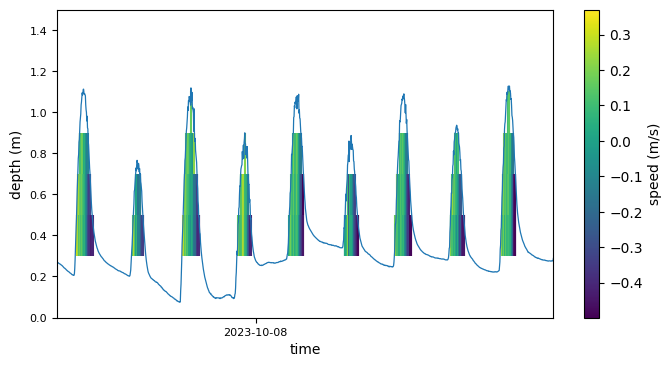

In [45]:
import numpy as np

# Specify the file path
# file_path = r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v2"

plt.figure(figsize=(10, 6))

data_array = np.loadtxt(file_path[1])
dir_columns = df['dir_column'].to_numpy()
speed_columns = df['speed_column'].to_numpy()

speed_columns = np.transpose(speed_columns)
dir_columns = np.transpose(dir_columns)
data_array = np.transpose(data_array)

print(len(data_array[0]), len(speed_columns[0]), len(dir_columns[0]))
print(len(data_array), len(speed_columns), len(dir_columns))

# Set a threshold for excluding values
threshold = -8
mask = np.array(data_array) < -0.5

# Create a masked array to exclude values below the threshold
# masked_array = np.ma.masked_array(data_array, mask)
# masked_array = np.ma.masked_array(dir_columns, mask)
masked_array = np.ma.masked_array(data_array, mask)
fig, ax1 = plt.subplots(figsize=(8, 4))

# Print the resulting array
# Assuming x and y axes correspond to indices
x_axis = df.index
y_axis = depths

# Create a meshgrid from x and y axes
X, Y = np.meshgrid(x_axis, y_axis)

# Plot the filled contours
plt.scatter(X, Y, s=900, c=masked_array[:][0:len(df.index)], edgecolor='none', marker='|')
# plt.contourf(X, Y, masked_array[:][0:len(df.index)], cmap='viridis')

num_ticks = 5

date_num = mdates.date2num(x_axis) # Convert datetime objects to numerical values
tick_positions = np.linspace(date_num.min(), date_num.max(), num=num_ticks) # Compute the tick positions
tick_dates = mdates.num2date(tick_positions) # Convert numerical values back to datetime objects

ax1.set_xticks(ticks=tick_dates)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='both', which='major', labelsize=8)

# Add color bar for reference
plt.colorbar(label = 'speed (m/s)')

# Label the axes
plt.xlabel('time')
plt.ylabel('depth (m)')

plt.plot(df.index, df['Pressure'], linewidth=0.9)

# Set x-axis and y-axis limits
plt.xlim(df.index[300], df.index[1700])  # Adjust as needed
plt.ylim(-0.001, 1.5) #y_axis[4])  # Adjust as needed

# Show the plot
plt.show()

In [12]:
import numpy as np

# Specify the file path
# file_path = r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v2"

# Read the data from the file into a NumPy array
# data_array = np.loadtxt(file_path[1])
# data_array = np.transpose(data_array)
# resized_data_column = [row[:-1] for row in data_column]
# resized_dir_column = [row[:-1] for row in dir_column]
# resized_speed_column = [row[:-1] for row in speed_column]

# Set a threshold for excluding values
threshold = -8
mask = np.array(data_column) < -0.5

# Create a masked array to exclude values below the threshold
masked_array = np.ma.masked_array(data_column, mask)

print(len(masked_array), len(masked_array[0]))

fig, ax1 = plt.subplots(figsize=(8, 4))

# Print the resulting array
# Assuming x and y axes correspond to indices
x_axis = df.index
y_axis = depths

print(len(df.index))
print(len(depths))

# Create a meshgrid from x and y axes
X, Y = np.meshgrid(x_axis, y_axis)

# Plot the filled contours
plt.contourf(X, Y, masked_array[:][0:len(df.index)-1], cmap='viridis')

num_ticks = 15

date_num = mdates.date2num(x_axis) # Convert datetime objects to numerical values
tick_positions = np.linspace(date_num.min(), date_num.max(), num=num_ticks) # Compute the tick positions
tick_dates = mdates.num2date(tick_positions) # Convert numerical values back to datetime objects

ax1.set_xticks(ticks=tick_dates)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='both', which='major', labelsize=8)

# Add color bar for reference
plt.colorbar(label = 'speed (m/s)')

# Label the axes
plt.xlabel('time')
plt.ylabel('distance (m)')

# Set x-axis and y-axis limits
plt.xlim(x_axis[6800], x_axis[int(9000)])  # Adjust as needed
plt.ylim(y_axis[0], y_axis[4])  # Adjust as needed

# Show the plot
plt.show()

NameError: name 'data_column' is not defined

In [196]:
import numpy as np

# Specify the file path
# file_path = r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v2"

# Read the data from the file into a NumPy array
data_column



# Set a threshold for excluding values
threshold = -8
mask = np.array(data_column) < -0.5
# Create a masked array to exclude values below the threshold
masked_array = np.ma.masked_array(data_column, mask)

print(len(masked_array), len(masked_array[0]))

fig, ax1 = plt.subplots(figsize=(8, 4))

# Print the resulting array
# Assuming x and y axes correspond to indices
x_axis = df.index
y_axis = depths

print(len(df.index))
print(len(depths))

# Create a meshgrid from x and y axes
X, Y = np.meshgrid(x_axis, y_axis)

# Plot the filled contours
plt.contourf(X, Y, masked_array[:][0:len(df.index)-1], cmap='viridis')

num_ticks = 9

date_num = mdates.date2num(x_axis) # Convert datetime objects to numerical values
tick_positions = np.linspace(date_num.min(), date_num.max(), num=num_ticks) # Compute the tick positions
tick_dates = mdates.num2date(tick_positions) # Convert numerical values back to datetime objects

ax1.set_xticks(ticks=tick_dates)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='both', which='major', labelsize=8)

# Add color bar for reference
plt.colorbar(label = 'speed (m/s)')

# Label the axes
plt.xlabel('time')
plt.ylabel('distance (m)')

# Set x-axis and y-axis limits
plt.xlim(x_axis[0], x_axis[int(9000/5)])  # Adjust as needed
plt.ylim(y_axis[0], y_axis[4])  # Adjust as needed

# Show the plot
plt.show()

<class 'list'>
